In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
# necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [3]:
df = pd.read_csv("Admission_Prediction.csv")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [6]:
# to replace the missing values in the 'GRE Score' column with the mode of the column
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)

In [7]:
# to replace the missing values in the 'GRE Score' column with the mode of the column
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)

In [8]:
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)


In [9]:
# dropping thr 'Chance of admit and 'serial number' as theare not going to be used as features for prediction
x=df.drop(['Chance of Admit','Serial No.'], axis=1)
y=df['Chance of Admit']

In [10]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


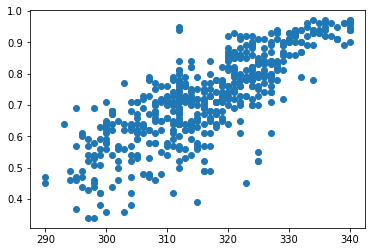

In [11]:
# Realtionship between GRE Score and Chance of Admission
plt.scatter(df['GRE Score'],y)

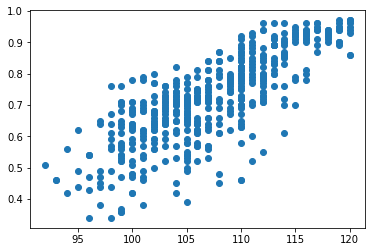

In [12]:
plt.scatter(df['TOEFL Score'],y)

In [12]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [13]:
# spltting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.33, random_state=100)

In [14]:
# fitting the date to the Linear regression model
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x, train_y)

LinearRegression()

In [15]:
# calculation the accuracy of the model
from sklearn.metrics import r2_score
score = r2_score(reg.predict(test_x), test_y)

In [16]:
score

0.8076993525686702

In [17]:
# saving the model to the local file sytem
filename = 'finalized_model.pickle'
pickle.dump(reg, open(filename, 'wb'))

In [19]:
# predition using the saved model.
loaded_model = pickle.load(open(filename, 'rb'))
prediction = loaded_model.predict(([[320,120,5,5,5,10,1]]))
print(prediction[0])

0.9957821919825962
